<a href="https://colab.research.google.com/github/knabeel77/conditional-independency-of-US-stocks-given-US-dollar-index/blob/main/project_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection and Preparation

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats


In [ ]:
list_of_tickers=[
"AAPL",
"QQQ",
"XLV", #healthcare
"XLP", #consumer staples
"XLK", #technology
"XLU", #utilities
"XLE", #energy
"^FTSE", #UK market index,
"HSI" ,# Hong Kong market
"DX-Y.NYB", #US dollar
"XLF" #financial
]



In [ ]:
start_date = "1999-01-06"
end_date = "2020-12-01"



In [ ]:
pr=yf.download(list_of_tickers,start_date,end_date)


[*********************100%***********************]  11 of 11 completed


Adj Close                                                  \
                  AAPL   DX-Y.NYB           HSI         QQQ        XLE   
Date                                                                     
1999-01-06    0.317270  94.529999  10233.799805         NaN  13.032797   
1999-01-07    0.341967  93.720001  10693.599609         NaN  12.973322   
1999-01-08    0.341967  94.349998  10922.700195         NaN  13.032797   
1999-01-11    0.348616  94.660004      7.470000         NaN  12.786412   
1999-01-12    0.350516  94.790001      8.060000         NaN  12.591001   
...                ...        ...           ...         ...        ...   
2020-11-24  113.630356  92.230003  26588.199219  289.938995  36.071590   
2020-11-25  114.478859  91.989998  26669.800781  291.721191  35.230427   
2020-11-26         NaN        NaN           NaN         NaN        NaN   
2020-11-27  115.031372  91.790001  26894.699219  294.409210  34.818790   
2020-11-30  117.458504  91.870003  26341.500000  295.009735  32.894855   

                                                                     ...  \
                  XLF         XLK        XLP        XLU         XLV  ...   
Date                                                                 ...   
1999-01-06  12.266915   26.470566  15.730736  13.041305   18.884003  ...   
1999-01-07  12.455389   26.387489  15.551775  12.994416   18.795860  ...   
1999-01-08  12.533921   26.494308  15.489138  13.068098   19.027227  ...   
1999-01-11  12.345448   26.755447  15.175944  12.719794   19.071306  ...   
1999-01-12  11.999901   26.031376  15.059628  12.726492   18.994181  ...   
...               ...         ...        ...        ...         ...  ...   
2020-11-24  27.303305  119.113426  62.838226  59.539104  104.767395  ...   
2020-11-25  27.208035  119.367790  62.800690  59.696686  104.382370  ...   
2020-11-26        NaN         NaN        NaN        NaN         NaN  ...   
2020-11-27  27.122292  120.003716  62.791302  59.103424  105.344955  ...   
2020-11-30  26.560226  120.805962  62.781929  58.250618  105.633713  ...   

             Volume                                                            \
           DX-Y.NYB       HSI         QQQ         XLE         XLF         XLK   
Date                                                                            
1999-01-06      0.0       0.0         NaN     56400.0    129871.0    624700.0   
1999-01-07      0.0       0.0         NaN     72600.0     89986.0    534600.0   
1999-01-08      0.0       0.0         NaN    421100.0    173694.0    532800.0   
1999-01-11      0.0  140482.0         NaN     35000.0     62904.0    497900.0   
1999-01-12      0.0  169830.0         NaN     89200.0    117437.0    486000.0   
...             ...       ...         ...         ...         ...         ...   
2020-11-24      0.0       0.0  24516800.0  53466000.0  60983200.0   6817000.0   
2020-11-25      0.0       0.0  23326800.0  35676200.0  45204600.0   6093200.0   
2020-11-26      NaN       NaN         NaN         NaN         NaN         NaN   
2020-11-27      0.0       0.0  17163100.0  18755400.0  26981200.0   3512900.0   
2020-11-30      0.0       0.0  27836200.0  41543600.0  72524200.0  16114600.0   

                                                              
                   XLP         XLU         XLV         ^FTSE  
Date                                                          
1999-01-06    118500.0     41000.0     38500.0  9.038480e+08  
1999-01-07     43500.0    222300.0     15900.0  6.501240e+08  
1999-01-08     63800.0    135900.0     24400.0  5.596120e+08  
1999-01-11     65400.0    129000.0      7700.0  4.101370e+08  
1999-01-12     29400.0      7100.0    270700.0  5.650130e+08  
...                ...         ...         ...           ...  
2020-11-24   6064900.0  10903500.0   9615900.0  1.301561e+09  
2020-11-25   5245400.0  11492600.0  11671800.0  1.129314e+09  
2020-11-26         NaN         NaN         NaN  7.362725e+08  
2020-11-27   3228600

In [ ]:
pr2=pr["Adj Close"]

In [ ]:
df=pd.DataFrame(pr2)


In [ ]:
df_test=df.iloc[:200,]

In [ ]:
df_test

,AAPL,DX-Y.NYB,HSI,QQQ,XLE,XLF,XLK,XLP,XLU,XLV,^FTSE
Date,,,,,,,,,,,
1999-01-06,0.317270,94.529999,10233.799805,NaN,13.032797,12.266915,26.470566,15.730736,13.041305,18.884003,6148.799805
1999-01-07,0.341967,93.720001,10693.599609,NaN,12.973322,12.455389,26.387489,15.551775,12.994416,18.795860,6101.200195
1999-01-08,0.341967,94.349998,10922.700195,NaN,13.032797,12.533921,26.494308,15.489138,13.068098,19.027227,6147.200195
1999-01-11,0.348616,94.660004,7.470000,NaN,12.786412,12.345448,26.755447,15.175944,12.719794,19.071306,6085.000000
1999-01-12,0.350516,94.790001,8.060000,NaN,12.591001,11.999901,26.031376,15.059628,12.726492,18.994181,6033.600098
...,...,...,...,...,...,...,...,...,...,...,...
1999-10-08,0.498227,99.019997,21.719999,54.737644,14.384891,11.788595,32.298843,14.125426,12.905720,19.379791,6199.399902
1999-10-11,0.506776,98.769997,12992.700195,55.508965,14.600102,11.661839,32.619328,14.143469,12.823692,19.324709,6234.799805
1999-10-12,0.514376,97.949997,12759.299805,54.248005,14.677570,11.440009,32.037693,13.872864,12.570770,18.994181,6174.899902


In [ ]:

df.to_csv("project_data.csv", index=True)

from google.colab import files

files.download('project_data.csv')

In [ ]:
price=pd.DataFrame()
pr2=[]
for i in list_of_tickers:

    pr=yf.download(i,start_date,end_date)
    pr2.append(pr["Adj Close"].values)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
from scipy.stats import shapiro

In [ ]:
for i in range(len(pr2)):
    print(shapiro(pr2[i]))

ShapiroResult(statistic=0.7336024641990662, pvalue=0.0)
ShapiroResult(statistic=0.8076604604721069, pvalue=0.0)
ShapiroResult(statistic=0.789547860622406, pvalue=0.0)
ShapiroResult(statistic=0.8385316133499146, pvalue=0.0)
ShapiroResult(statistic=0.7971153259277344, pvalue=0.0)
ShapiroResult(statistic=0.8957108855247498, pvalue=0.0)
ShapiroResult(statistic=0.9277603626251221, pvalue=1.401298464324817e-45)
ShapiroResult(statistic=0.957582950592041, pvalue=2.0089005816250406e-37)
ShapiroResult(statistic=0.9692293405532837, pvalue=8.555404372970062e-33)


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import kstest

In [ ]:
kstest(pr2[0],'norm')

KstestResult(statistic=0.5966173672161983, pvalue=2.2662455678459448e-164)

In [ ]:
price=stock_data['Adj Close'].values
price1= market["Adj Close"].values
price3= nasdaq["Adj Close"].values

In [ ]:
df_test.columns

Index(['AAPL', 'DX-Y.NYB', 'HSI', 'QQQ', 'XLE', 'XLF', 'XLK', 'XLP', 'XLU',
       'XLV', '^FTSE'],
      dtype='object')

In [ ]:
import pingouin as pg

result= pg.partial_corr(data=df_test, x='AAPL', y="XLE", covar="DX-Y.NYB", method='pearson')

In [ ]:
print(result)

           n         r        CI95%         p-val
pearson  196  0.762727  [0.7, 0.82]  2.202879e-38


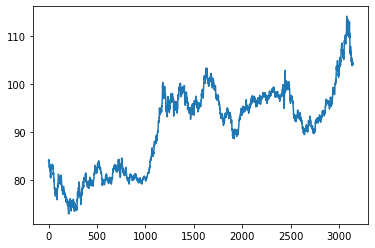

In [ ]:
plt.plot(price)

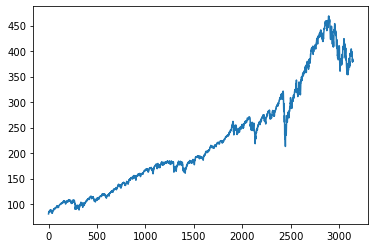

In [ ]:
plt.plot(price1)

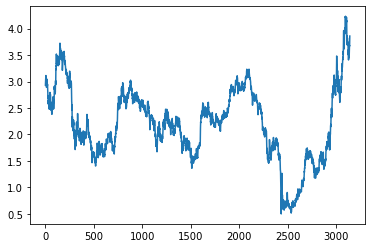

In [ ]:
plt.plot(price3)

In [ ]:
ret = (price[1:]-price[:-1])/price[0:-1]
ret1 = (price1[1:]-price1[:-1])/price1[0:-1]
ret3 = (price3[1:]-price3[:-1])/price3[0:-1]

(array([   2.,   10.,   36.,  186.,  801., 1379.,  553.,  140.,   31.,
           6.]),
 array([-0.02370232, -0.01927927, -0.01485623, -0.01043318, -0.00601013,
        -0.00158708,  0.00283596,  0.00725901,  0.01168206,  0.01610511,
         0.02052815]),
 <BarContainer object of 10 artists>)

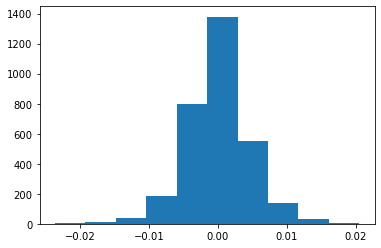

In [ ]:
#Dollar index returns histogram
plt.hist(ret)

(array([2.00e+00, 1.00e+00, 3.00e+00, 3.70e+01, 3.23e+02, 2.40e+03,
        3.52e+02, 1.70e+01, 5.00e+00, 2.00e+00]),
 array([-0.10942382, -0.0894211 , -0.06941837, -0.04941565, -0.02941292,
        -0.0094102 ,  0.01059252,  0.03059525,  0.05059797,  0.0706007 ,
         0.09060342]),
 <BarContainer object of 10 artists>)

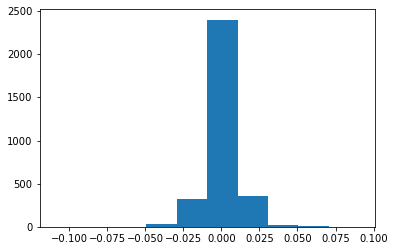

In [ ]:
#S&P 500 returns histogram
plt.hist(ret1)

(array([3.000e+00, 3.000e+00, 5.900e+01, 2.606e+03, 4.560e+02, 9.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.29320109, -0.21398118, -0.13476127, -0.05554136,  0.02367855,
         0.10289846,  0.18211837,  0.26133828,  0.34055819,  0.4197781 ,
         0.49899801]),
 <BarContainer object of 10 artists>)

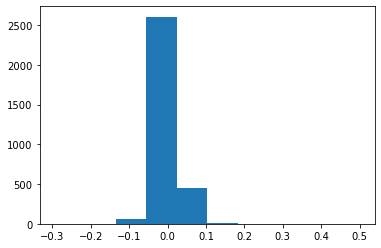

In [ ]:
#NASDAQ returns histogram
plt.hist(ret3)

In [ ]:
#concatenating the whole returns together? maybe not!

Splitting the dataset! This code will be dynamic since we don't know which timeframes are the best to split and we gotta figure this out on the way by trial and error! One thing I can guarantee is that the timeframe will not be less than 6-months!

In [ ]:
#Splitting

Normality test

In [ ]:
#normality tests for tickers, normality for US Dollar

# note that this test only spits out the p-value for the test! if we do the whole dataset on US dollar, It'll be anything but normal!

stats.normaltest(ret)

NormaltestResult(statistic=116.87058209304972, pvalue=4.18673574283375e-26)